In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is in a CSV file named 'amazon_data.csv'
df = pd.read_csv(r"C:\Users\Praneeth\Desktop\Book1.csv")
df.head(3)


,Sno,ProductID,OrderDate,DeliveryDate,Quantity,Price,Supplier,Location,Fullfiment days,Volume
0,1,P1171,01-01-2022,05-01-2022,3,7859,Vendor41,Ahmedabad,4,Medium
1,2,P1048,12-11-2023,16-11-2023,2,6674,Vendor95,Hyderabad,4,Low
2,3,P1052,02-03-2023,06-03-2023,4,2248,Vendor6,Hyderabad,4,Medium


In [2]:
#!pip install pandas matplotlib seaborn folium geopy

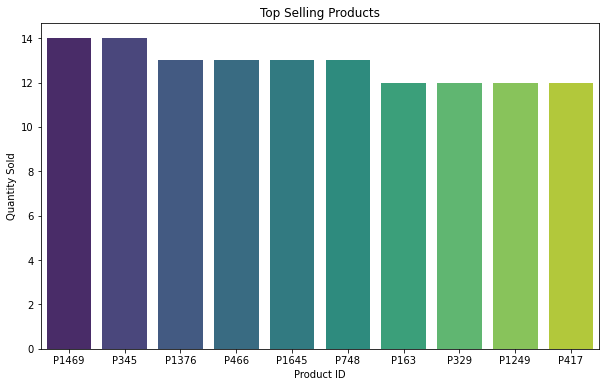

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'YourDataFrame' with your actual DataFrame name

# Group by ProductID and sum the quantity sold
product_sales_quantity = df.groupby('ProductID')['Quantity'].sum().reset_index()

# Sort by quantity in descending order and get the top 10
top_selling_products = product_sales_quantity.sort_values(by='Quantity', ascending=False).head(10)

# Use Seaborn for a more modern and aesthetically pleasing bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductID', y='Quantity', data=top_selling_products, palette='viridis')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top Selling Products')
plt.show()


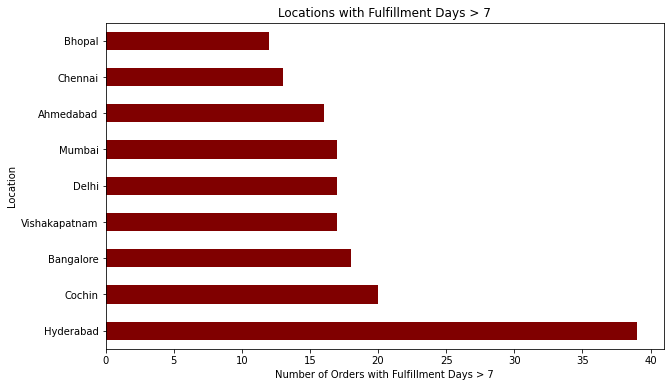

In [4]:
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'YourDataFrame' with your actual DataFrame name

# Filter locations where fulfillment days are more than 7
high_fulfillment_locations = df[df['Fullfiment days'] > 7]

# Count the occurrences of each location
location_counts = high_fulfillment_locations['Location'].value_counts()

location_counts.plot(kind='barh', figsize=(10, 6), color='maroon')
plt.xlabel('Number of Orders with Fulfillment Days > 7')
plt.ylabel('Location')
plt.title('Locations with Fulfillment Days > 7')
plt.show()


The supplier Vendor37 is delaying at the following locations: Bangalore, Vishakapatnam, Ahmedabad, Hyderabad
The supplier Vendor32 is delaying at the following locations: Ahmedabad, Mumbai, Bhopal, Chennai
The supplier Vendor45 is delaying at the following locations: Ahmedabad, Hyderabad, Delhi, Bhopal
The supplier Vendor29 is delaying at the following locations: Hyderabad, Mumbai, Bhopal, Vishakapatnam, Chennai
The supplier Vendor76 is delaying at the following locations: Bangalore, Hyderabad, Chennai, Delhi, Mumbai, Cochin


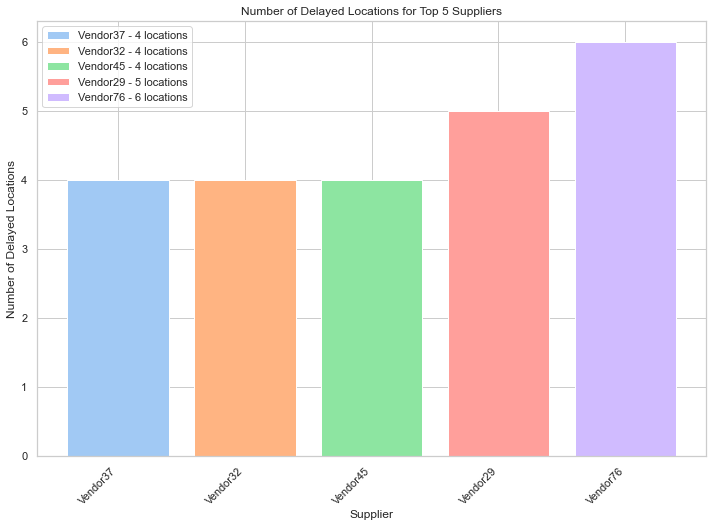

In [5]:
# Group by Supplier and calculate the average fulfillment days
average_fulfillment_by_supplier = df.groupby('Supplier')['Fullfiment days'].mean()

# Find the top 5 suppliers with the highest average fulfillment days
top_delayed_suppliers = average_fulfillment_by_supplier.nlargest(5)

# Get the locations where each of the top 5 suppliers is delaying
delayed_locations_by_supplier = {}
for supplier in top_delayed_suppliers.index:
    delayed_locations = df[df['Supplier'] == supplier]['Location'].unique()
    delayed_locations_by_supplier[supplier] = delayed_locations

# Print information
for supplier, locations in delayed_locations_by_supplier.items():
    print(f"The supplier {supplier} is delaying at the following locations: {', '.join(locations)}")
    
# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
colors = sns.color_palette("pastel", n_colors=len(top_delayed_suppliers))

for i, (supplier, locations) in enumerate(delayed_locations_by_supplier.items()):
    plt.bar(i, len(locations), color=colors[i], label=f"{supplier} - {len(locations)} locations")

plt.xlabel('Supplier')
plt.ylabel('Number of Delayed Locations')
plt.title('Number of Delayed Locations for Top 5 Suppliers')
plt.xticks(range(len(top_delayed_suppliers)), top_delayed_suppliers.index, rotation=45, ha='right')
plt.legend()
plt.show()

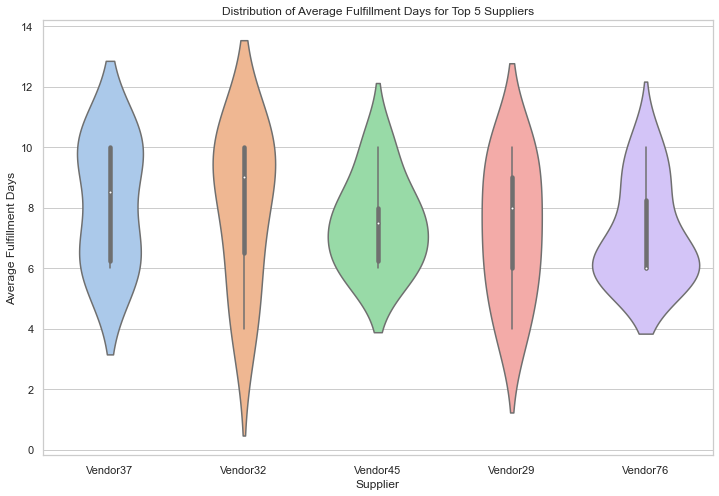

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Supplier and calculate the average fulfillment days
average_fulfillment_by_supplier = df.groupby('Supplier')['Fullfiment days'].mean()

# Find the top 5 suppliers with the highest average fulfillment days
top_delayed_suppliers = average_fulfillment_by_supplier.nlargest(5)

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x=df['Supplier'], y=df['Fullfiment days'], order=top_delayed_suppliers.index, palette='pastel')
plt.xlabel('Supplier')
plt.ylabel('Average Fulfillment Days')
plt.title('Distribution of Average Fulfillment Days for Top 5 Suppliers')
plt.show()

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


+----------+------------------+
|  Month   | Predicted Orders |
+----------+------------------+
| Jan 2024 |        70        |
| Feb 2024 |        52        |
| Mar 2024 |        87        |
| Apr 2024 |        87        |
| May 2024 |        88        |
| Jun 2024 |       121        |
| Jul 2024 |       108        |
| Aug 2024 |        75        |
| Sep 2024 |        73        |
| Oct 2024 |        94        |
| Nov 2024 |        58        |
| Dec 2024 |        47        |
+----------+------------------+


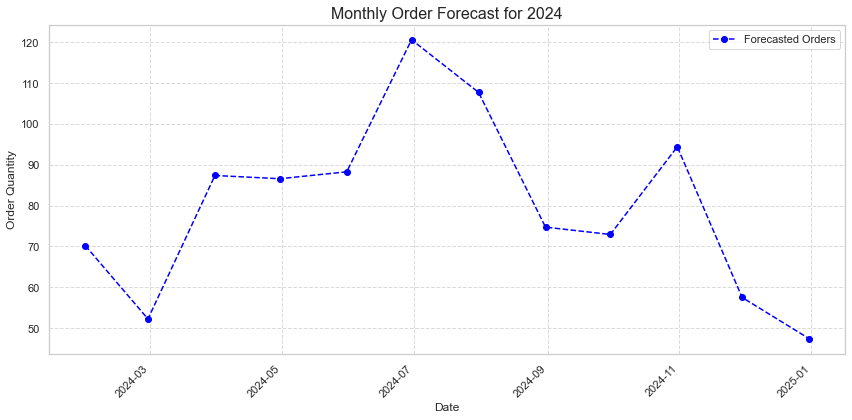

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'YourDataFrame' with your actual DataFrame name

# Assuming your dataset has an 'OrderDate' column, make sure it's in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract the relevant time series (e.g., monthly orders)
time_series = df.set_index('OrderDate')['Quantity'].resample('M').sum()

# Define SARIMA model parameters (replace with your chosen values)
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, m = 1, 1, 1, 12  # Seasonal parameters

# Fit a SARIMA model
model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast monthly orders for 2024
order_date_range_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
forecast = results.get_forecast(steps=len(order_date_range_2024))

# Extract forecasted values and create a DataFrame
forecast_values = forecast.predicted_mean
forecast_df = pd.DataFrame({'OrderDate': order_date_range_2024, 'PredictedOrders': forecast_values})

from prettytable import PrettyTable

# Create a PrettyTable instance
table = PrettyTable()

# Define the table headers
table.field_names = ["Month", "Predicted Orders"]

# Add rows to the table
for index, row in forecast_df.iterrows():
    month_year = row['OrderDate'].strftime('%b %Y')
    predicted_orders = round(row['PredictedOrders'])
    table.add_row([month_year, predicted_orders])

# Print the table
print(table)
# Plotting forecasted values only with a more stylized appearance
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['OrderDate'], forecast_df['PredictedOrders'], label='Forecasted Orders', linestyle='dashed', color='blue', marker='o')
plt.title('Monthly Order Forecast for 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# END